In [1]:

#basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#NLP imports
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import *
import re

#Classification imports
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# LOADING DATA

In [2]:
df =  pd.read_csv('C:/Users/rowan/Desktop/nlp-task/data4.csv',header=0)

df2 = df

# EXPLORING DATA

In [3]:
df.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [4]:
df.shape

(8586, 2)

In [5]:
df.describe().T


,count,unique,top,freq
job title,8586,3890,marketing executive,91
industry,8586,4,IT,4746


In [6]:
df.dtypes


job title    object
industry     object
dtype: object

In [7]:
#df = df.rename(columns = {'job title': 'jobtitle'}, inplace = False)


In [8]:
df.isna().sum()


job title    0
industry     0
dtype: int64

In [9]:
df.industry.value_counts()


IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

In [10]:
df["job title"].value_counts()


marketing executive                                           91
php developer                                                 54
trainee network technician                                    53
software developer                                            53
marketing manager                                             49
                                                              ..
digital designer - ux/ui                                       1
digital marketing executive - restaurant chain                 1
marketing and creative manager - salary circa £50k - poole     1
data analyst, sql, ecommerce, central london - £45k            1
creative copywriter (arabic/english)                           1
Name: job title, Length: 3890, dtype: int64

In [11]:
df.info()
print("\nThere are only ",len(df['job title'].unique()),"unique entries in job titles.")
print("\nThere are 4 Classes in the data: ",df['industry'].unique())
classes = np.array(df['industry'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB

There are only  3890 unique entries in job titles.

There are 4 Classes in the data:  ['IT' 'Marketing' 'Education' 'Accountancy']


<Figure size 720x432 with 0 Axes>

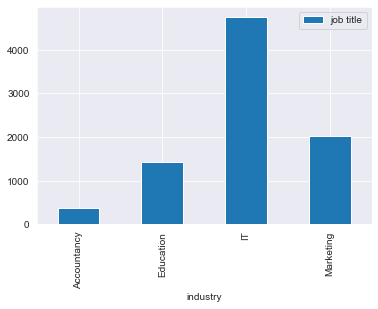

In [13]:
plt.figure(figsize=(10,6));
df.groupby('industry').count().plot.bar(ylim=0);
plt.show();

<AxesSubplot:xlabel='industry', ylabel='count'>

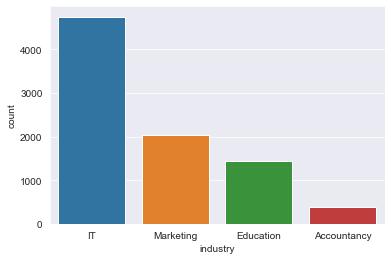

In [12]:
sns.set_style("darkgrid")
sns.countplot(x="industry",data=df)

# CLEANING THE DATA

1-lowering the text 

2-use regular expressions 

3-Apply Tokenization to split the text 

4-apply Stemming to get the root of the word 

In [14]:
def cleanalltext(text):
    text = text.lower()
    text = re.sub("german[^\s]+","",text)
    text = re.sub("bournemouth[^\s]+","",text)
    text = re.sub("international[^\s]+","",text)
    text = re.sub("flex[^\s]+","",text)
    text = re.sub("15[^\s]+","",text)
    text = re.sub("flexible[^\s]+","",text)
    text = re.sub("numerous[^\s]+","",text)
    text = re.sub("belfast[^\s]+","",text)
    text = re.sub("on[^\s]+","",text)
    text = re.sub("in[^\s]+","",text)
    text = re.sub("up[^\s]+","",text)
    text = re.sub("45[^\s]+","",text)
    text = re.sub("west[^\s]+","",text)
    text = re.sub("london[^\s]+","",text)
    text = re.sub("part[^\s]+","",text)
    text = re.sub("must[^\s]+","",text)
    text = re.sub("2[^\s]+","",text)
    text = re.sub("1/2[^\s]+","",text)
    text = re.sub("no[^\s]+","",text)
    text = re.sub("Â[^\s]+","",text)
    text = re.sub("12[^\s]+","",text)
    text = text.replace("1st","")  
    text = re.sub("leading [^\s]+","",text)
    text = re.sub("1st[^\s]+","",text)
    text = re.sub("3rd[^\s]+","",text)
    text = re.sub("2nd[^\s]+","",text)
    text = re.sub("bristol[^\s]+","",text)
    text = re.sub("healthcare[^\s]+","",text)
    text = re.sub("good[^\s]+","",text)
    text = re.sub("pool[^\s]+","",text)
    text = re.sub("6 months[^\s]+","",text)
    text = re.sub("free[^\s]+","",text)
    text = re.sub("invest[^\s]+","",text)
    text = text.replace("o365","")
    text = text.replace("remote","")
    text = text.replace("-"," ")
    text = text.replace("/"," ")
    text = text.replace("("," ")
    text = text.replace(")"," ")
    text = text.replace("soa04086"," ")
    return text

    

In [15]:
def remove_stop_words(text):
    sw = stopwords.words("english")
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)


In [16]:
def stemming(text):
    ps = PorterStemmer()
    text = text.split()
    stemmed_words = []
    for word in text :
        stemmed_words.append(ps.stem(word))
    return " ".join(stemmed_words)

In [17]:
from nltk.stem import WordNetLemmatizer
def stemming(inp): 
    tokenizer=nltk.tokenize.WordPunctTokenizer()
    tokens = tokenizer.tokenize(inp)
    stemmer = SnowballStemmer("english", ignore_stopwords=True)
    stemming_words = [stemmer.stem(w) for w in tokens]
    return(' '.join(stemming_words))

In [18]:
def run(text):
    text = cleanalltext(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [19]:
df['job title'] = df['job title'].apply(stemming)


In [20]:
df['job title'] = df['job title'].apply(run)


In [21]:
df.head()

,job title,industry
0,"technic helpdesk counti build , ayr",IT
1,senior technic engin,IT
2,head servic,IT
3,js fr end engin,IT
4,network teleph c,IT


In [44]:
df.tail()

,job title,industry
8581,data entri clerk,Marketing
8582,c creator,Marketing
8583,sale & market manag,Marketing
8584,market & digit market c,Marketing
8585,creativ copywrit arab english,Marketing


In [22]:
df.shape

(8586, 2)

# Balancing Data


I will use upsampling(oversampling), as the # of point is too small to do downsampling, and imblearn’s SMOTE or Synthetic Minority Oversampling isn't preferable for text features.

perform oversampling before executing cross-validation

# Split Data


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df['job title'], df['industry'], test_size=0.2, random_state=1)


In [24]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [25]:
# Separate majority and minority classes
df_it = X[X.industry=='IT']
df_marketing = X[X.industry=='Marketing']
df_education = X[X.industry=='Education']
df_accountancy = X[X.industry=='Accountancy']

In [26]:
from sklearn.utils import resample
# Upsample minority classes
df_marketing_upsampled = resample(df_marketing, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_it),    # to match majority class
                                 random_state=123) # reproducible results

df_education_upsampled = resample(df_education, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_it),    # to match majority class
                                 random_state=27) # reproducible results
df_accountancy_upsampled = resample(df_accountancy, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_it),    # to match majority class
                                 random_state=56) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_it, df_marketing_upsampled,df_education_upsampled,df_accountancy_upsampled])
 


In [27]:
# Display new class counts
df_upsampled.industry.value_counts()

IT             3797
Marketing      3797
Education      3797
Accountancy    3797
Name: industry, dtype: int64

In [28]:
df.industry.value_counts()


IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

# Text Vectorization


In [29]:
# Vectorize the Data using tfidfVectorizer() {use appropriate parameters}
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(df_upsampled['job title'])
x_train = vectorizer.transform(df_upsampled['job title'])
x_test = vectorizer.transform(X_test)
y_train = df_upsampled['industry']

# Modeling


RandomForestClassifier provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data. If there are more trees, it won't allow over-fitting trees in the model.
it gives best result over other classification algorithms

In [ ]:
# train RandomForestModel on the vectorized train data and score accuracy on test data
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=1)  
classifier.fit(x_train.toarray(), y_train)
prediction = classifier.predict(x_test.toarray())

# Model Evaluation


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction))  
print(accuracy_score(y_test, prediction))

[[ 65   5   6   2]
 [ 15 224   8  13]
 [ 32   2 889  26]
 [ 21  17  31 362]]
              precision    recall  f1-score   support

 Accountancy       0.49      0.83      0.62        78
   Education       0.90      0.86      0.88       260
          IT       0.95      0.94      0.94       949
   Marketing       0.90      0.84      0.87       431

    accuracy                           0.90      1718
   macro avg       0.81      0.87      0.83      1718
weighted avg       0.91      0.90      0.90      1718

0.8963911525029103


# Saving model and vecorizer for later use by flask


In [35]:
import pickle
pickle.dump(classifier, open('Classifier.pkl', 'wb'))
pickle.dump(vectorizer, open('Vectorizer.pkl', 'wb'))